**Starting of the research**

**Importing the data set and all the needed libraries to complete the required tasks**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**Reading the file**

In [2]:
data = pd.read_csv('/home/9e0e5292-28dd-4863-80e5-827ea4a5d78c/5/coupons.csv')
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


**2. Investigate the dataset for missing or problematic data. --- Examining the file for cleaning, detecting null values as well as removing duplicates**

In [3]:
data.shape

(12684, 26)

In [4]:
data.isnull().sum().sort_values()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
toCoupon_GEQ25min           0
direction_same              0
Y                           0
direction_opp               0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

**3. Decide what to do about your missing data -- drop, replace, other...**

In [6]:
data.drop_duplicates()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [11]:
data.rename(columns={'Y':'CouponAcceptance'},inplace=True)

**4. What proportion of the total observations chose to accept the coupon?***

In [13]:
data.CouponAcceptance.value_counts()

CouponAcceptance
1    7210
0    5474
Name: count, dtype: int64

**5. Use a bar plot to visualize the `coupon` column.**

Text(0.5, 1.0, 'Count of Coupon Acceptance or Rejection')

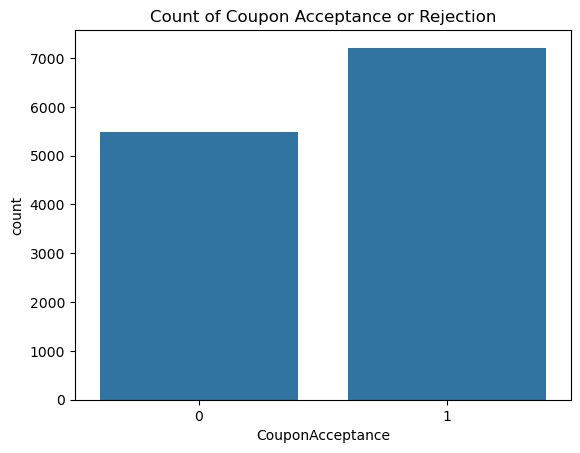

In [15]:
sns.countplot(data = data, x = 'CouponAcceptance')
plt.title('Count of Coupon Acceptance or Rejection')

Text(0.5, 1.0, 'Coupon Types')

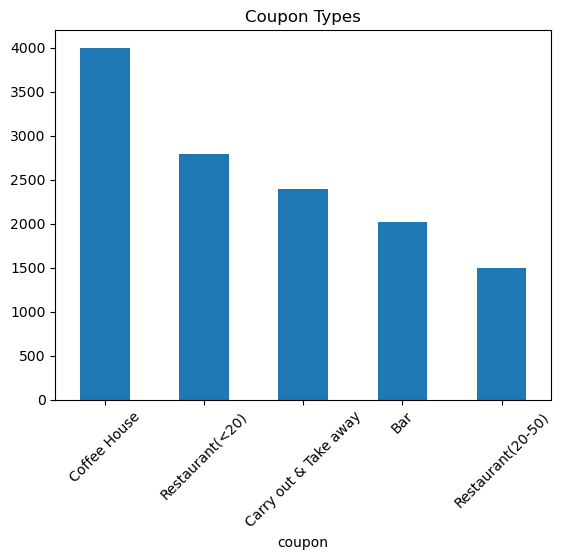

In [16]:
data.coupon.value_counts().plot(kind = 'bar')
plt.xticks(rotation=45)
plt.title('Coupon Types')

**6. Use a histogram to visualize the temperature column.**

Text(0.5, 1.0, 'Temperature vs Coupon Acceptance')

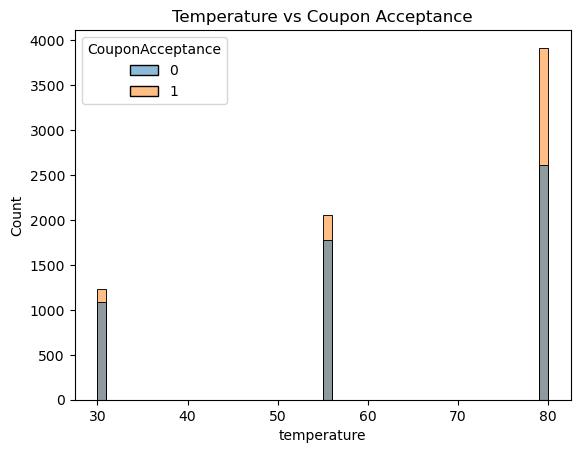

In [17]:
sns.histplot(data = data, x = 'temperature', bins=50, hue = 'CouponAcceptance')
plt.title('Temperature vs Coupon Acceptance')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
only_bar_coupons = data.loc[data['coupon'] == 'Bar']

In [20]:
only_bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,CouponAcceptance
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


**2. What proportion of bar coupons were accepted?**

<Axes: xlabel='Bar', ylabel='count'>

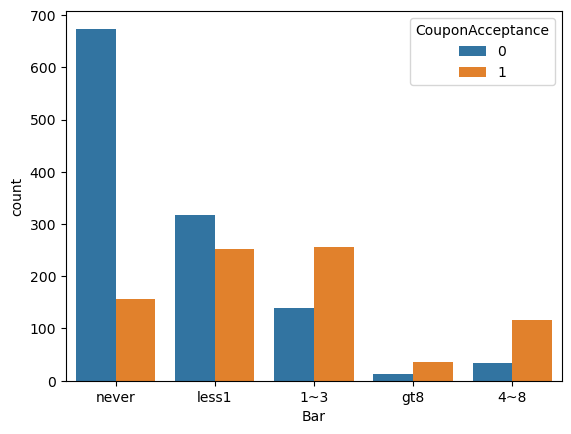

In [22]:
sns.countplot(data = only_bar_coupons, x = 'Bar', hue = 'CouponAcceptance')

In [27]:
only_bar_coupons.CouponAcceptance.value_counts()

CouponAcceptance
0    1190
1     827
Name: count, dtype: int64

In [29]:
bar_coupon_acceptance = round(pd.crosstab(only_bar_coupons.Bar, data.CouponAcceptance, normalize = True)*100,2)
bar_coupon_acceptance.astype(str) + '%'

CouponAcceptance,0,1
Bar,,
1~3,7.01%,12.88%
4~8,1.65%,5.86%
gt8,0.65%,1.8%
less1,15.88%,12.68%
never,33.77%,7.82%


**Making additional cleaning and data adjustment to accommodate the analysis further from this point**

In [31]:
data.fillna(False).head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,CouponAcceptance
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,False,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,False,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,False,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,False,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,False,4~8,1~3,1,1,0,0,1,0


**3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.**

In [33]:
acceptance_3_or_less = data[(data['Bar'].str.contains('1~3', na=False)) | (data['Bar'].str.contains('less1', na=False))]
acceptance_3_or_less['Bar'].value_counts().sum()

5955

In [35]:
acceptance_4_or_more = data[(data['Bar'].str.contains('4~8', na=False)) | (data['Bar'].str.contains('gt8', na=False))]
acceptance_4_or_more['Bar'].value_counts().sum()

1425

In [37]:
bar_coupon_acceptance_rate_for_acceptance_3_or_less = round(pd.crosstab(acceptance_3_or_less.Bar, data.CouponAcceptance, normalize = True)*100,2)
bar_coupon_acceptance_rate_for_acceptance_3_or_less.astype(str) + '%'

CouponAcceptance,0,1
Bar,,
1~3,15.7%,25.83%
less1,25.51%,32.96%


In [39]:
bar_coupon_acceptance_rate_for_acceptance_4_or_more = round(pd.crosstab(acceptance_4_or_more.Bar, data.CouponAcceptance, normalize = True)*100,2)
bar_coupon_acceptance_rate_for_acceptance_4_or_more.astype(str) + '%'

CouponAcceptance,0,1
Bar,,
4~8,27.37%,48.14%
gt8,10.39%,14.11%


In [41]:
data.age.value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

**4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?**


**Over the age of 25**

In [43]:
acceptance_1_or_more_and_age25andover = data[(data['Bar'].str.contains('4~8', na=False)) | (data['Bar'].str.contains('gt8', na=False)) | (data['Bar'].str.contains('1~3', na=False)) & (data['age'].isin(['26', '31', '50plus', '36', '41', '46']))]
acceptance_1_or_more_and_age25andover['Bar'].value_counts().sum()

3195

<Axes: xlabel='CouponAcceptance', ylabel='count'>

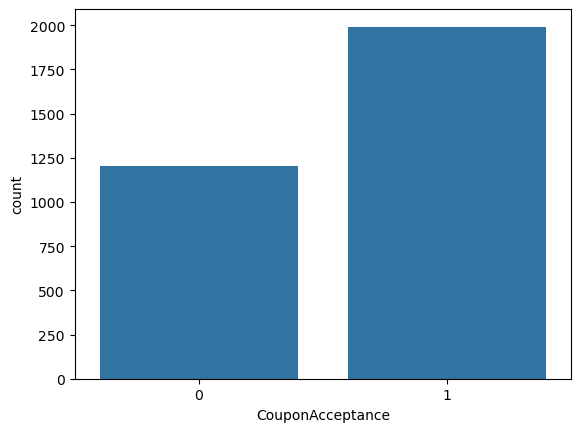

In [45]:
sns.countplot(data = acceptance_1_or_more_and_age25andover, x = 'CouponAcceptance')

**All Others**

In [47]:
acceptance_1_or_more_and_age24andbelow = data[(data['Bar'].str.contains('4~8', na=False)) | (data['Bar'].str.contains('gt8', na=False)) | (data['Bar'].str.contains('1~3', na=False)) & (data['age'].isin(['below21', '21']))]
acceptance_1_or_more_and_age24andbelow['Bar'].value_counts().sum()

2128

<Axes: xlabel='CouponAcceptance', ylabel='count'>

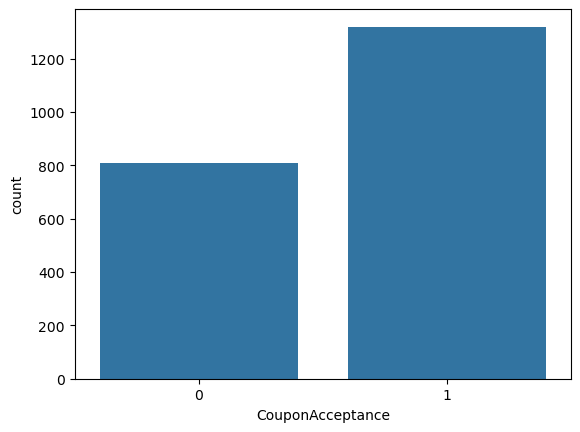

In [49]:
sns.countplot(data = acceptance_1_or_more_and_age24andbelow, x = 'CouponAcceptance')

**5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.**

In [85]:
# Corrected code with proper boolean operations and parentheses
acceptance_1_or_more_and_pssg_no_kid_and_occp_not_frmng_fishing_forstry = data[
    # Group the 'Bar' conditions together
    ((data['Bar'].str.contains('4~8', na=False)) | 
     (data['Bar'].str.contains('gt8', na=False)) | 
     (data['Bar'].str.contains('1~3', na=False))) & 
    # Add the passenger condition
    (data['passanger'].str.contains("Kid(s)", regex=True, na=False)==False) &
    (data['occupation'].str.contains('Farming Fishing & Forestry',regex=True, na=False)==False)
]

acceptance_1_or_more_and_pssg_no_kid_and_occp_not_frmng_fishing_forstry['CouponAcceptance'].value_counts().sum()

/tmp/ipykernel_355/3467428121.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (data['passanger'].str.contains("Kid(s)", regex=True, na=False)==False) &


3898

<Axes: xlabel='CouponAcceptance', ylabel='count'>

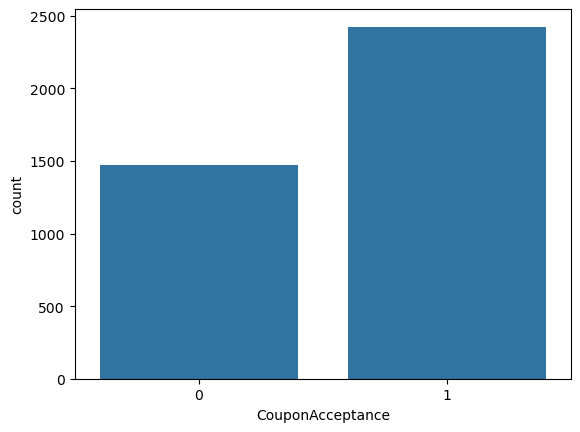

In [95]:
sns.countplot(data = acceptance_1_or_more_and_pssg_no_kid_and_occp_not_frmng_fishing_forstry, x = 'CouponAcceptance')

**6. Compare the acceptance rates between those drivers who:**

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.


**go to bars more than once a month, had passengers that were not a kid, and were not widowed OR**

In [99]:
data.maritalStatus.value_counts()

maritalStatus
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: count, dtype: int64

In [159]:
opt1_acceptance_1_or_more_and_pssg_no_kid_and_not_widowed = data[
    # Group the 'Bar' conditions together
    ((data['Bar'].str.contains('4~8', na=False)) | 
     (data['Bar'].str.contains('gt8', na=False)) | 
     (data['Bar'].str.contains('1~3', na=False))) & 
    # Add the passenger condition
    (data['passanger'].str.contains("Kid(s)", regex=True, na=False)==False) &
    (data['maritalStatus'].str.contains('Widowed',regex=True, na=False)==False)
]

opt1_acceptance_1_or_more_and_pssg_no_kid_and_not_widowed['CouponAcceptance'].value_counts().sum()

/tmp/ipykernel_355/1007169910.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  (data['passanger'].str.contains("Kid(s)", regex=True, na=False)==False) &


3898

<Axes: xlabel='CouponAcceptance', ylabel='count'>

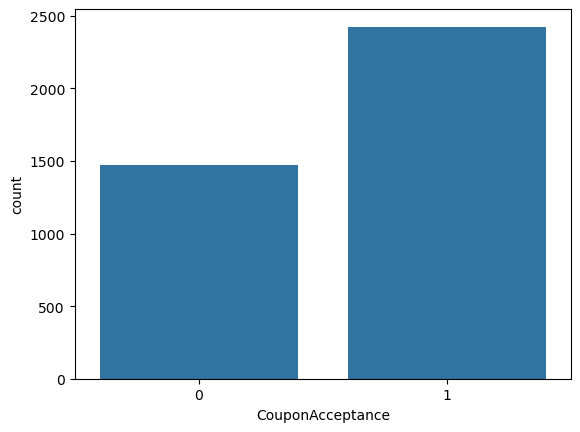

In [161]:
sns.countplot(data = opt1_acceptance_1_or_more_and_pssg_no_kid_and_not_widowed, x = 'CouponAcceptance')

**go to bars more than once a month and are under the age of 30 OR**

In [163]:
opt2_acceptance_1_or_more_and_under30 = data[
    # Group the 'Bar' conditions together
    ((data['Bar'].str.contains('4~8', na=False)) | 
     (data['Bar'].str.contains('gt8', na=False)) | 
     (data['Bar'].str.contains('1~3', na=False))) & 
    (data['age'].isin(['21','26', 'below21']))
]

opt2_acceptance_1_or_more_and_under30['CouponAcceptance'].value_counts().sum()

2272

In [109]:
data.age.value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

<Axes: xlabel='CouponAcceptance', ylabel='count'>

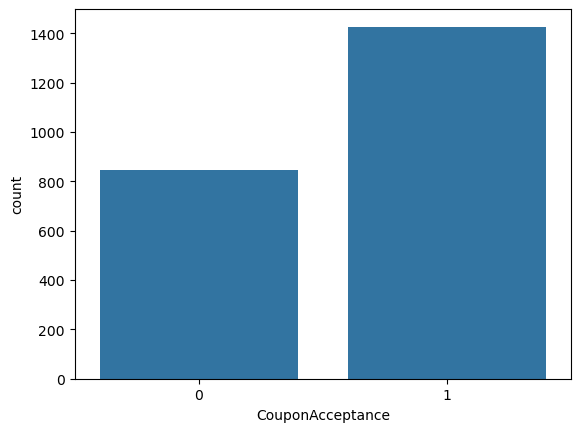

In [165]:
sns.countplot(data = opt2_acceptance_1_or_more_and_under30, x = 'CouponAcceptance')

**go to cheap restaurants more than 4 times a month and income is less than 50K.**

In [153]:
opt3_cheap_rest_more4_income_less50K = data[
    # Group the 'Bar' conditions together
    ((data['Bar'].str.contains('4~8', na=False)) | 
     (data['Bar'].str.contains('gt8', na=False)) | 
     (data['Bar'].str.contains('1~3', na=False))) & 
    # Add the passenger condition
    (data['age'].isin(['21','26', 'below21']))
]

opt3_cheap_rest_more4_income_less50K['CouponAcceptance'].value_counts().sum()

2272

**Evaluating datasets for further control**

In [117]:
data.RestaurantLessThan20.value_counts()

RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64

In [119]:
data.Restaurant20To50.value_counts()

Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64

In [121]:
data.income.value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [155]:
opt3_cheap_rest_more4_income_less50K = data[
    # Group the 'Bar' conditions together
    ((data['RestaurantLessThan20'].str.contains('4~8', na=False)) | 
     (data['RestaurantLessThan20'].str.contains('gt8', na=False)) | 
     (data['Restaurant20To50'].str.contains('gt8', na=False)) |
     (data['Restaurant20To50'].str.contains('4~8', na=False))) &
    # Add the passenger condition
    (data['income'].isin(['$25000 - $37499','$12500 - $24999', '$37500 - $49999']))
]

opt3_cheap_rest_more4_income_less50K['CouponAcceptance'].value_counts().sum()

1886

<Axes: xlabel='CouponAcceptance', ylabel='count'>

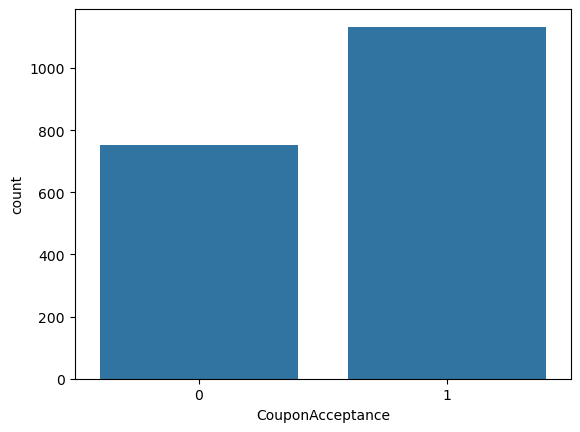

In [157]:
sns.countplot(data = opt3_cheap_rest_more4_income_less50K, x = 'CouponAcceptance')

**End of Reaserch**